# Q.1

Write a linear congruential random number generator in Python. Use it to obtain
10,000 uniformly distributed random numbers between 0 and 1. Make a density histogram of your numbers and compare it to the uniform PDF.

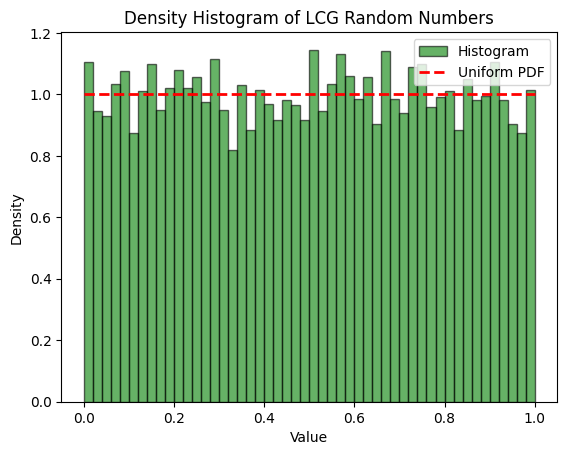

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters for the LCG
a = 1664525
c = 1013904223
m = 2**32
state = 12345  # Seed value

def lcg_next():
    global state
    state = (a * state + c) % m
    return state

def lcg_random():
    return lcg_next() / m

# Generate 10,000 uniformly distributed random numbers between 0 and 1 using LCG
random_numbers10k = [lcg_random() for _ in range(10000)]

# Plotting the density histogram of the random numbers
plt.hist(random_numbers10k, bins=50, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')

# Plot the uniform PDF for comparison
x = np.linspace(0, 1, 100)
uniform_pdf = np.ones_like(x)
plt.plot(x, uniform_pdf, 'r--', linewidth=2, label='Uniform PDF')

plt.title('Density Histogram of LCG Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# Q.2
Write a Python code to obtain 10,000 uniformly distributed random numbers between
0 and 1 using the library function np.random.rand(). Make a density histogram of
your numbers and compare it to the uniform PDF.

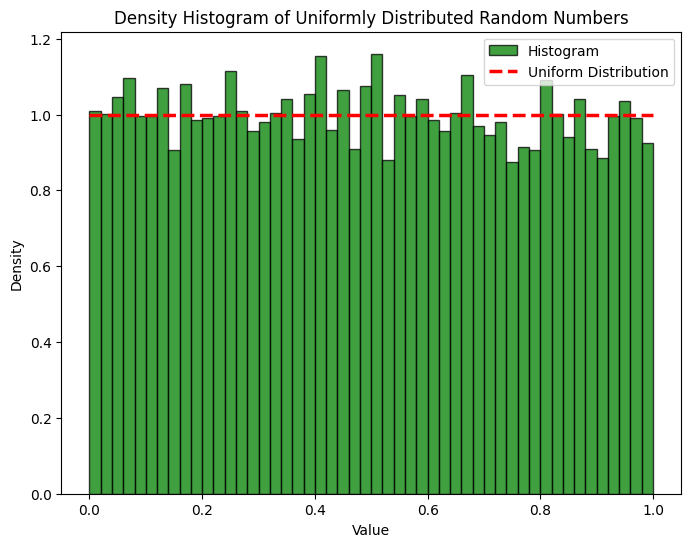

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 uniformly distributed random numbers between 0 and 1
random_numbers = np.random.rand(10000)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.75, color='g', edgecolor='black', label='Histogram')

# Plotting the theoretical uniform distribution
plt.plot([0, 1], [1, 1], 'r--', linewidth=2.5, label='Uniform Distribution')

# Adding labels and title
plt.title('Density Histogram of Uniformly Distributed Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')

# Adding legend
plt.legend()

# Show plot
plt.show()


# Q.3 
How long did each of your codes above take to produce 10,000 uniform deviates?

In [76]:
import numpy as np
import time

# Using np.random.rand()
start_time = time.perf_counter()
random_numbers = np.random.rand(10000)
end_time = time.perf_counter()

# Print the time taken
print(f"Time taken using np.random.rand(): {end_time - start_time:.10f} seconds")


# Using linear congruential random number generator
# Define the parameters for the LCG
a = 1664525
c = 1013904223
m = 2**32
state = 12345  # Seed value

def lcg_next():
    global state
    state = (a * state + c) % m
    return state

def lcg_random():
    return lcg_next() / m

# Generate 10,000 random numbers
start_time = time.perf_counter()
random_numbers = [lcg_random() for _ in range(10000)]
end_time = time.perf_counter()

# Print the time taken
print(f"Time taken using linear congruential random number generator: {end_time - start_time:.10f} seconds")


Time taken using np.random.rand(): 0.0003707000 seconds
Time taken using linear congruential random number generator: 0.0075657000 seconds


# Q.4
Use the Transformation method in a C code to produce 10,000 random numbers distributed according to an exponential distribution with mean 0.5. Make a density
histogram of your numbers and compare it to the exponential PDF

### I already run C code to generate random number data file, here using it I plot histogram 

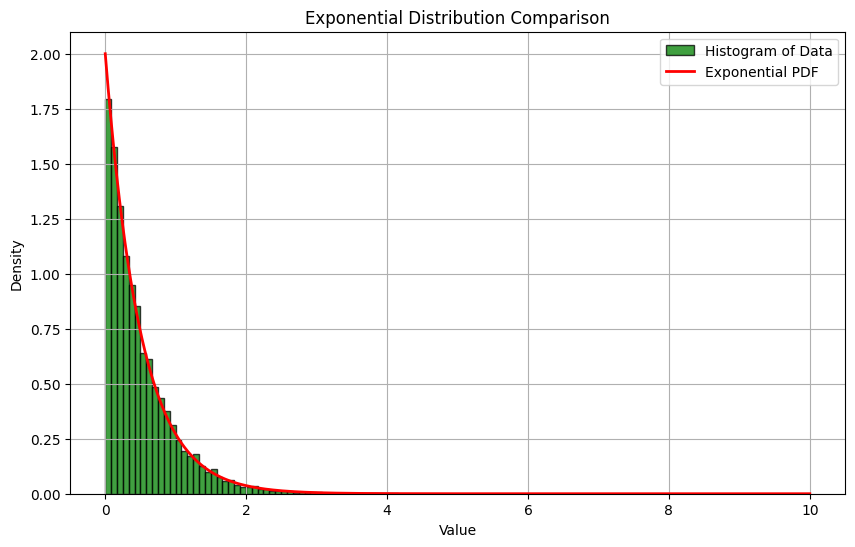

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load data from text file
data = np.loadtxt('exponential_data.txt')

# Calculate parameters
mean = 0.5
lambda_ = 1.0 / mean

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.75, color='g', label='Histogram of Data', edgecolor='black')

# Plot theoretical PDF
x = np.linspace(0, 10, 1000)
pdf = lambda_ * np.exp(-lambda_ * x)
plt.plot(x, pdf, 'r-', lw=2, label='Exponential PDF')

plt.title('Exponential Distribution Comparison')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Q.5 
Use the Box-Muller method in a Python code to produce 10,000 random numbers
distributed according to a Gaussian distribution with mean 0 and variance 1. Make a
density histogram of your numbers and compare it to the Gaussian PDF.

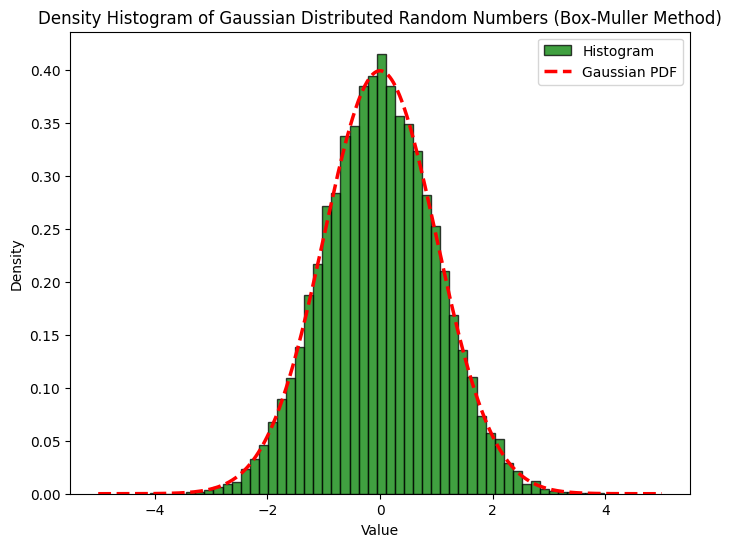

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random numbers
num_samples = 10000

# Generate uniformly distributed random numbers
u1 = np.random.rand(num_samples)
u2 = np.random.rand(num_samples)

# Box-Muller transformation
z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

# Given that mean = 0 and variance = 1
mean = 0
variance = 1

# Combine z1 and z2 to get the desired Gaussian distribution
random_numbers = mean + variance * np.concatenate((z1, z2))

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.75, color='g', edgecolor='black', label='Histogram')

# Plotting the Gaussian PDF
x = np.linspace(-5, 5, 1000)
pdf = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x**2)
plt.plot(x, pdf, 'r--', linewidth=2.5, label='Gaussian PDF')

# Adding labels and title
plt.title('Density Histogram of Gaussian Distributed Random Numbers (Box-Muller Method)')
plt.xlabel('Value')
plt.ylabel('Density')

# Adding legend
plt.legend()

# Show plot
plt.show()


# Q.6 
### Using the Rejection Method to Generate Random Numbers

Use the Rejection Method in a Python code to produce random numbers distributed according to the distribution:

$$ f(x) = \frac{r}{2\pi} e^{-\frac{x^2}{2}} \quad \text{for} \quad x \geq 0 $$

1. Implement the Rejection Method in Python to generate random numbers.
2. Make a density histogram of the generated numbers.
3. Compare the histogram to the theoretical distribution.


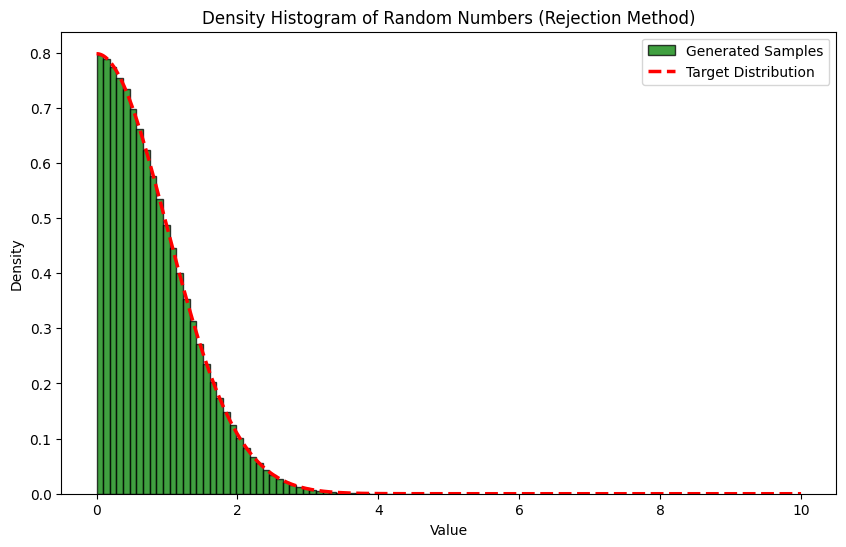

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution function
def target_distribution(x):
    return np.sqrt(2 / np.pi) * np.exp(-x**2 / 2)

# Proposal distribution function (Exponential distribution)
def proposal_distribution(x):
    return np.exp(-x)

# Function to perform Rejection Sampling
def rejection_sampling(num_samples):
    samples = []
    M = np.sqrt(2 * np.pi)  # Upper bound for the target distribution

    while len(samples) < num_samples:
        x = np.random.exponential(1)
        u = np.random.uniform(0, 1)
        
        # Calculate acceptance probability
        if u <= target_distribution(x) / (M * proposal_distribution(x)):
            samples.append(x)
    
    return np.array(samples)

# Number of samples
num_samples = 1000000

# Generate samples using rejection sampling
random_numbers = rejection_sampling(num_samples)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.75, color='g', edgecolor='black', label='Generated Samples')

# Plotting the target distribution
x = np.linspace(0, 10, 1000)
pdf = np.sqrt(2 / np.pi) * np.exp(-x**2 / 2)
plt.plot(x, pdf, 'r--', linewidth=2.5, label='Target Distribution')

# Adding labels and title
plt.title('Density Histogram of Random Numbers (Rejection Method)')
plt.xlabel('Value')
plt.ylabel('Density')

# Adding legend
plt.legend()

# Show plot
plt.show()


# Q.7
### Applying the χ² Test to Dice Simulation

Consider the simulation of two dice that we discussed in class. Each dice yields an integer 1, 2, 3, 4, 5, 6 with equal probability. Suppose we got these counts in two runs of our simulation:

| Score           | 2 | 3 | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 |
|-----------------|---|---|----|----|----|----|----|----|----|----|----|
| Observed counts 1 | 4 | 10 | 10 | 13 | 20 | 18 | 18 | 11 | 13 | 14 | 13 |
| Observed counts 2 | 3 | 7 | 11 | 15 | 19 | 24 | 21 | 17 | 13 | 9  | 5  |

We will apply the χ² test to determine if these random numbers can be labeled as "not sufficiently random", "suspect", "almost suspect", or "sufficiently random".


In [6]:
import numpy as np
from scipy.stats import chi2

# Observed counts from two runs of simulation
observed_counts_run1 = np.array([4, 10, 10, 13, 20, 18, 18, 11, 13, 14, 13])
observed_counts_run2 = np.array([3, 7, 11, 15, 19, 24, 21, 17, 13, 9, 5])

# Total number of trials
total_trials = np.sum(observed_counts_run1)

# Probabilities for each sum from 2 to 12 (based on two six-sided dice)
probabilities = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36.0

# Expected counts based on probabilities
expected_counts = total_trials * probabilities

# Calculate the chi-square statistic
chi2_statistic_run1 = np.sum((observed_counts_run1 - expected_counts)**2 / expected_counts)
chi2_statistic_run2 = np.sum((observed_counts_run2 - expected_counts)**2 / expected_counts)

# Degrees of freedom
df = len(observed_counts_run1) - 1

# Critical value at alpha = 0.05 and df = 10
alpha1 = 0.05
alpha2 = 0.01
alpha3 = 0.001
critical_value1 = chi2.ppf(1 - alpha1, df)
critical_value2 = chi2.ppf(1 - alpha2, df)
critical_value3 = chi2.ppf(1 - alpha3, df)
# Determine the conclusion
def chi2_test_result(chi2_statistic, critical_value1, critical_value2, critical_value3 , df):
    if chi2_statistic > critical_value1:
        return "Not sufficiently random"
    elif chi2_statistic > critical_value2:
        return "Suspect"
    elif chi2_statistic > critical_value3:
        return "Almost suspect"
    else:
        return "Sufficiently random"

# Apply the chi-square test for both runs
result_run1 = chi2_test_result(chi2_statistic_run1, critical_value1, critical_value2, critical_value3 , df)
result_run2 = chi2_test_result(chi2_statistic_run2, critical_value1, critical_value2, critical_value3 , df)

# Print results
print(f"Run 1 result: {result_run1}")
print(f"Run 2 result: {result_run2}")


Run 1 result: Not sufficiently random
Run 2 result: Sufficiently random


# Q.8 
### Monte Carlo Integration for the Area of a Unit Circle

The area of a circle with unit radius is given by:

$$ I = \int_{-1}^{1} \int_{-1}^{1} f(x, y) \, dx \, dy, $$

where

$$ f(x, y) = 
\begin{cases} 
1 & \text{if } x^2 + y^2 \leq 1 \\
0 & \text{otherwise}
\end{cases} $$

We can calculate this area using Monte Carlo integration.

Approximated area of the unit circle: 3.164


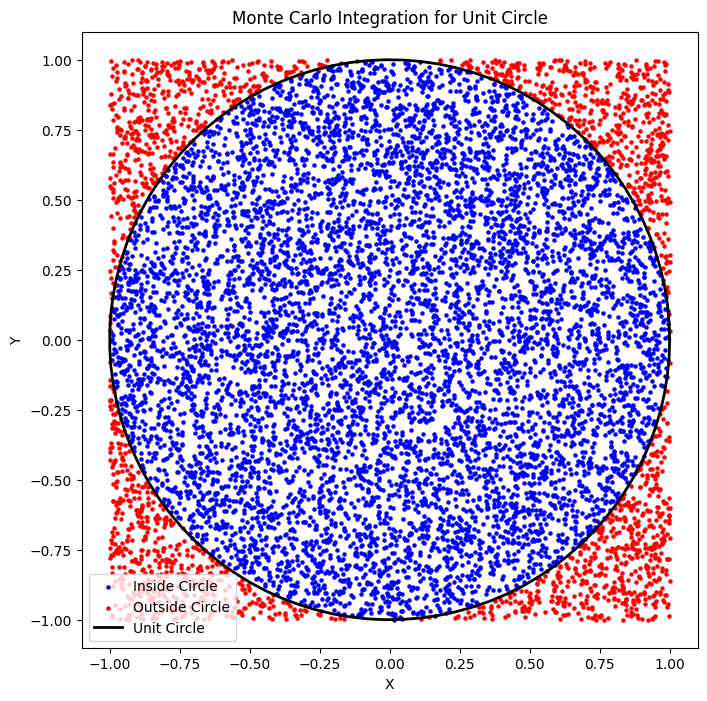

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random points
num_points = 10000

# Generate random points in the square [-1, 1] x [-1, 1]
points = np.random.uniform(low=-1, high=1, size=(num_points, 2))

# Calculate the distance of each point from the origin
distances = np.linalg.norm(points, axis=1)

# Points inside the unit circle
inside_points = points[distances <= 1]

# Points outside the unit circle
outside_points = points[distances > 1]

# Approximate the area of the unit circle
area_unit_circle = 4 * len(inside_points) / num_points

print("Approximated area of the unit circle:", area_unit_circle)

# Plotting the points
plt.figure(figsize=(8, 8))
plt.scatter(inside_points[:, 0], inside_points[:, 1], color='blue', s=5, label='Inside Circle')
plt.scatter(outside_points[:, 0], outside_points[:, 1], color='red', s=5, label='Outside Circle')

# Plot the unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), color='black', linewidth=2, label='Unit Circle')

plt.title('Monte Carlo Integration for Unit Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


### Then calculate the volume of a ten-dimensional unit sphere.

In [8]:
import numpy as np

# Number of random points
num_points = 1000000

# Generate random points in the hypercube [-1, 1]^10
points = np.random.uniform(low=-1, high=1, size=(num_points, 10))

# Calculate the distance of each point from the origin
distances = np.linalg.norm(points, axis=1)

# Count the points inside the ten-dimensional unit sphere
points_inside_sphere = np.sum(distances <= 1)

# Approximate the volume of the ten-dimensional unit sphere
volume_unit_sphere = 2**10 * points_inside_sphere / num_points

print("Approximated volume of the ten-dimensional unit sphere:", volume_unit_sphere)


Approximated volume of the ten-dimensional unit sphere: 2.541568


# Q.9
### Metropolis Algorithm for Sampling from a Uniform Density

We will use the Metropolis algorithm to sample from a density that is uniform for \(3 < x < 7\) and zero elsewhere. We'll then plot the Markov Chain and a density histogram of the sampled numbers, comparing it to the theoretical uniform distribution.


## Taking low number of sample point to see Metropolis markov chain 

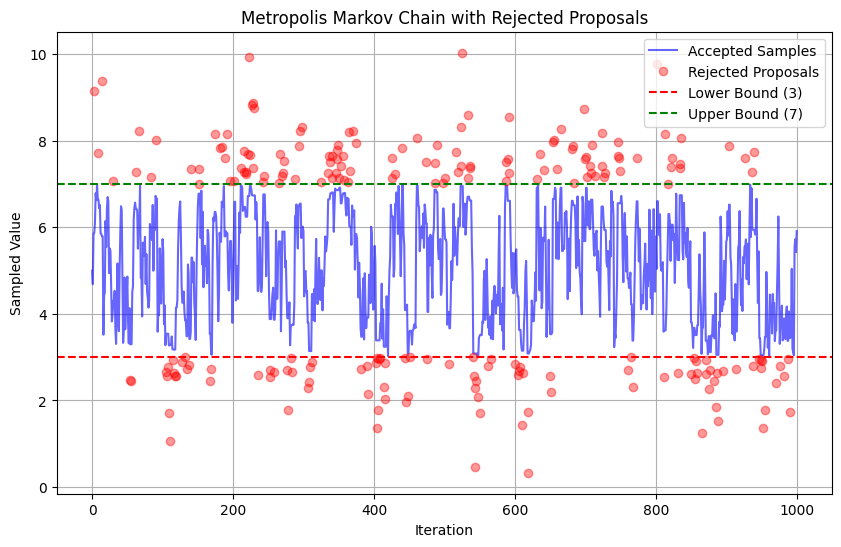

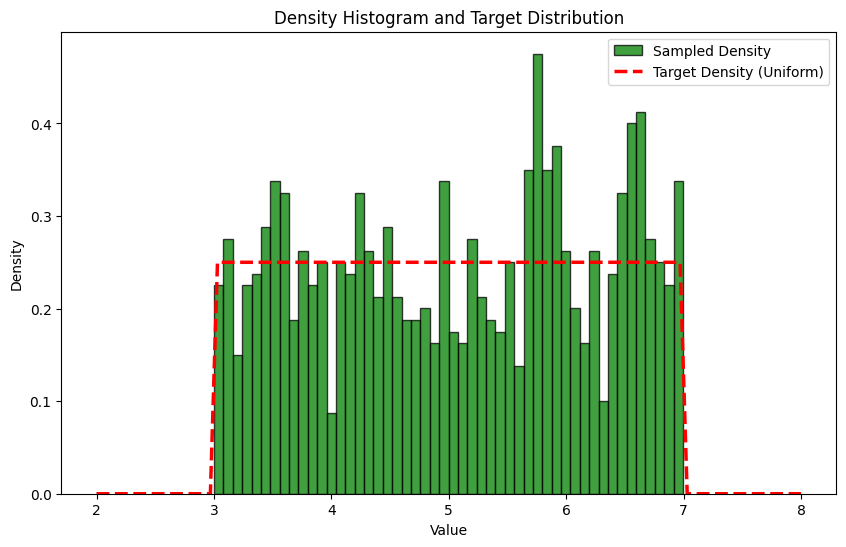

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target density function (uniform between 3 and 7)
def target_density(x):
    if 3 <= x <= 7:
        return 1 / (7 - 3)
    else:
        return 0

# Metropolis algorithm function
def metropolis_algorithm(num_samples, initial_state, proposal_std):
    samples = [initial_state]
    rejected_points = []
    current_state = initial_state

    for i in range(num_samples):
        # Propose a new state from a normal distribution
        proposal_state = np.random.normal(loc=current_state, scale=proposal_std)
        
        # Calculate acceptance probability
        acceptance_prob = min(1, target_density(proposal_state) / target_density(current_state))
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_prob:
            current_state = proposal_state
        else:
            rejected_points.append((i, proposal_state))
        
        samples.append(current_state)
    
    return np.array(samples), rejected_points

# Parameters
num_samples = 1000
initial_state = 5.0  # Initial state within the range [3, 7]
proposal_std = 1.0   # Standard deviation of the normal proposal distribution

# Generate samples using Metropolis algorithm
samples, rejected_points = metropolis_algorithm(num_samples, initial_state, proposal_std)

# Separate the indices and values of the rejected points
rejected_indices, rejected_values = zip(*rejected_points) if rejected_points else ([], [])

# Plot the Markov Chain with rejected points
plt.figure(figsize=(10, 6))
plt.plot(samples, color='blue', alpha=0.6, label='Accepted Samples')
plt.plot(rejected_indices, rejected_values, 'ro', alpha=0.4, label='Rejected Proposals')
plt.axhline(3, color='red', linestyle='--', label='Lower Bound (3)')
plt.axhline(7, color='green', linestyle='--', label='Upper Bound (7)')
plt.title('Metropolis Markov Chain with Rejected Proposals')
plt.xlabel('Iteration')
plt.ylabel('Sampled Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot the density histogram and compare with the uniform distribution
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.75, color='g', edgecolor='black', label='Sampled Density')

# Plot the true uniform density
x = np.linspace(2, 8, 100)
y = np.where((x >= 3) & (x <= 7), 1 / (7 - 3), 0)
plt.plot(x, y, 'r--', linewidth=2.5, label='Target Density (Uniform)')

# Adding labels and title
plt.title('Density Histogram and Target Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()  # Add legend

# Show plot
plt.show()


## Increasing the number of sample point to see uniform randomness 

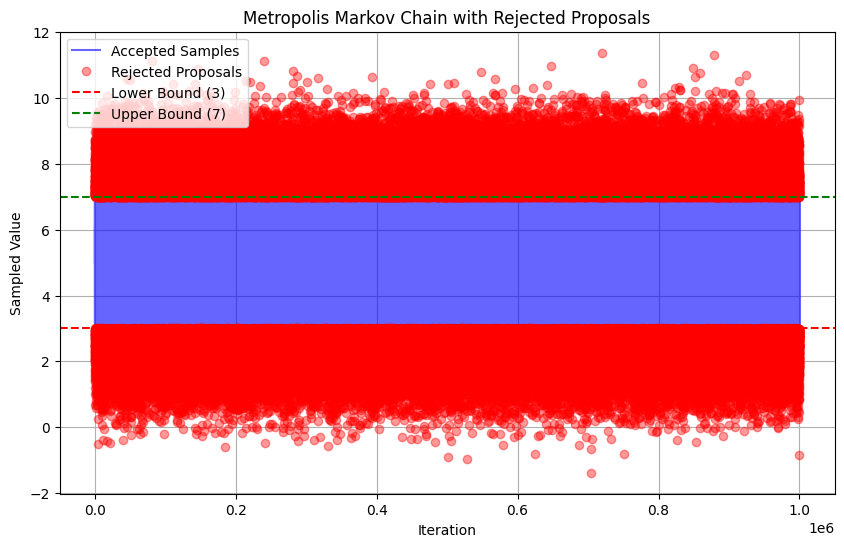

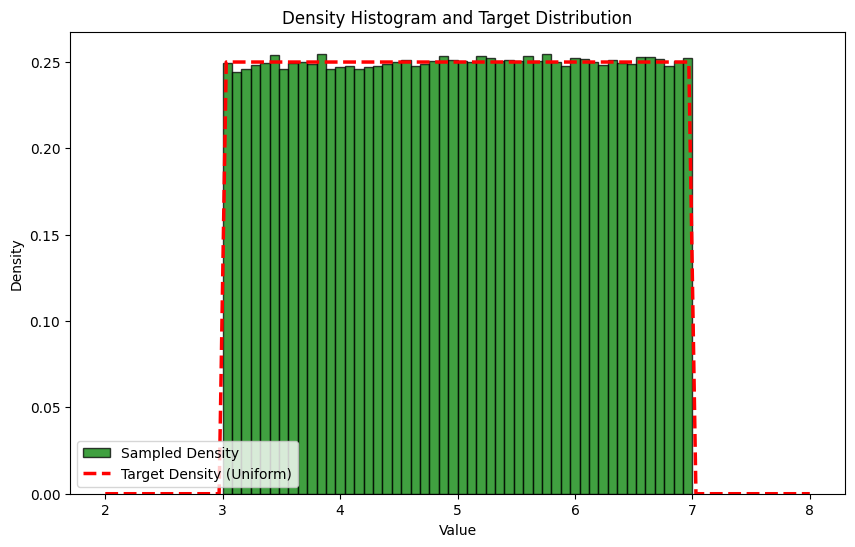

In [83]:
# Parameters
num_samples = 1000000

# Generate samples using Metropolis algorithm
samples, rejected_points = metropolis_algorithm(num_samples, initial_state, proposal_std)

# Separate the indices and values of the rejected points
rejected_indices, rejected_values = zip(*rejected_points) if rejected_points else ([], [])

# Plot the Markov Chain with rejected points
plt.figure(figsize=(10, 6))
plt.plot(samples, color='blue', alpha=0.6, label='Accepted Samples')
plt.plot(rejected_indices, rejected_values, 'ro', alpha=0.4, label='Rejected Proposals')
plt.axhline(3, color='red', linestyle='--', label='Lower Bound (3)')
plt.axhline(7, color='green', linestyle='--', label='Upper Bound (7)')
plt.title('Metropolis Markov Chain with Rejected Proposals')
plt.xlabel('Iteration')
plt.ylabel('Sampled Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot the density histogram and compare with the uniform distribution
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.75, color='g', edgecolor='black', label='Sampled Density')

# Plot the true uniform density
x = np.linspace(2, 8, 100)
y = np.where((x >= 3) & (x <= 7), 1 / (7 - 3), 0)
plt.plot(x, y, 'r--', linewidth=2.5, label='Target Density (Uniform)')

# Adding labels and title
plt.title('Density Histogram and Target Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()  # Add legend

# Show plot
plt.show()


# Q.10
### Bayesian Inference with MCMC for Quadratic Model Fitting

We will use the `emcee` library to fit the model \( y = ax^2 + bx + c \) to the data by performing Bayesian probabilistic inference using MCMC. The data can be found at [https://theory.tifr.res.in/~kulkarni/data.txt](https://theory.tifr.res.in/~kulkarni/data.txt). 

We will use the following approach:
1. Use a Gaussian likelihood and uniform priors.
2. Run 50 Markov chains with 4,000 steps each.
3. Determine the best-fit values for the parameters \(a\), \(b\), and \(c\) as the median of the posterior PDF.
4. Calculate the one-sigma uncertainties on these values.
5. Plot the Markov chains.
6. Use the `corner` library to plot the joint and marginalised posterior PDFs for the three model parameters.
7. Plot the data with the best-fit model and 200 models randomly chosen from the posterior.


### Load Data and Define Model

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Load data
data = np.loadtxt("data.txt")
x = data[:, 1]
y = data[:, 2]
yerr = data[:, 3]

# Define the model: y = ax^2 + bx + c
def model(theta, x):
    a, b, c = theta
    return a * x**2 + b * x + c


### Define Log Likelihood, Log Prior, and Log Probability Functions

In [85]:
# Define the log likelihood function
def log_likelihood(theta, x, y, yerr):
    model_y = model(theta, x)
    sigma2 = yerr**2
    return -0.5 * np.sum((y - model_y)**2 / sigma2 + np.log(sigma2))

# Define the log prior function
def log_prior(theta):
    a, b, c = theta
    if -10.0 < a < 10.0 and -10.0 < b < 10.0 and -10.0 < c < 10.0:
        return 0.0
    return -np.inf

# Define the log probability function
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


### Run MCMC with emcee

In [86]:
# Initial guess and setup for MCMC
np.random.seed(42)
initial = np.random.randn(50, 3)
nwalkers, ndim = initial.shape

# Run MCMC
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(initial, 4000, progress=True)

# Get the samples and calculate the best-fit parameters
samples = sampler.get_chain(discard=100, thin=15, flat=True)
a_median, b_median, c_median = np.median(samples, axis=0)

print(f"Best-fit values:\na = {a_median}\nb = {b_median}\nc = {c_median}")

# Calculate one-sigma uncertainties
a_sigma = np.std(samples[:, 0])
b_sigma = np.std(samples[:, 1])
c_sigma = np.std(samples[:, 2])

print(f"One-sigma uncertainties:\na = {a_sigma}\nb = {b_sigma}\nc = {c_sigma}")


You must install the tqdm library to use progress indicators with emcee


Best-fit values:
a = -0.008330731565212244
b = 3.9176955178111514
c = 1.3159186552989457
One-sigma uncertainties:
a = 0.0005160627092388122
b = 0.12413912433556189
c = 5.6457552119831425


### Plot Markov Chains

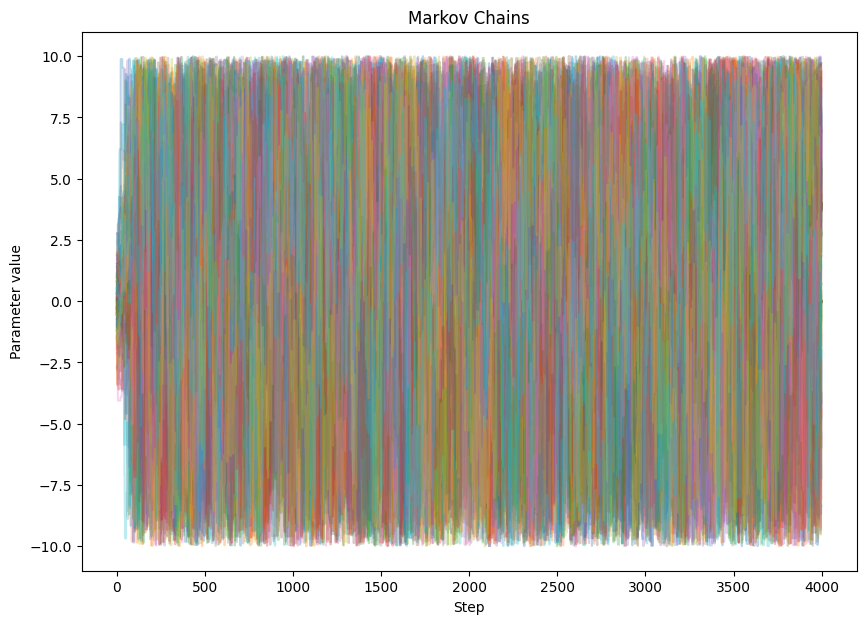

In [87]:
# Plot the Markov chains
plt.figure(figsize=(10, 7))
for i in range(ndim):
    plt.plot(sampler.chain[:, :, i].T, '-', alpha=0.3)
plt.title("Markov Chains")
plt.xlabel("Step")
plt.ylabel("Parameter value")
plt.show()


### Corner Plot of Posterior Distributions

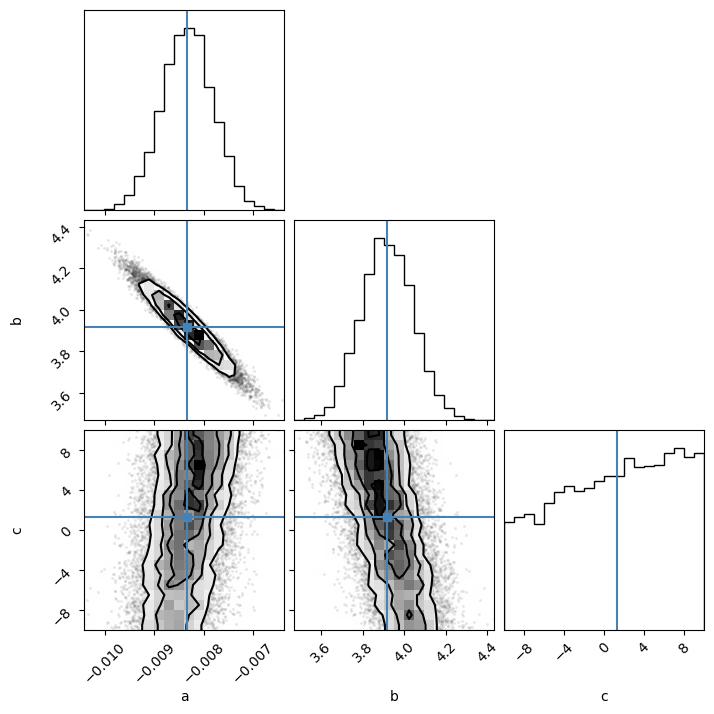

In [88]:
# Corner plot of the posterior distributions
fig = corner.corner(samples, labels=["a", "b", "c"], truths=[a_median, b_median, c_median])
plt.show()


### Plot Data with Best-fit Model and Posterior Samples

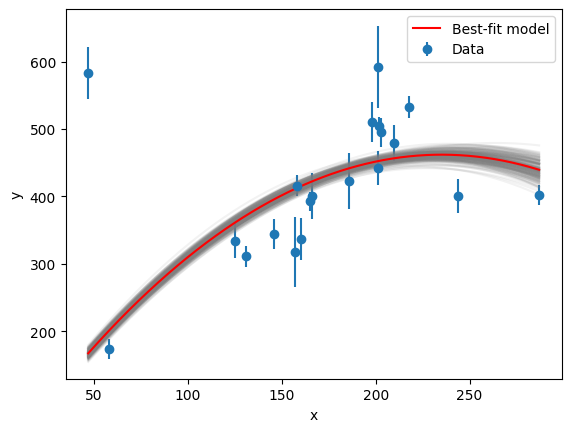

In [89]:
# Plot the data with the best-fit model and 200 models randomly chosen from the posterior
plt.errorbar(x, y, yerr, fmt='o', label='Data')
xfit = np.linspace(min(x), max(x), 1000)
for s in samples[np.random.randint(len(samples), size=200)]:
    plt.plot(xfit, model(s, xfit), color="gray", alpha=0.1)
plt.plot(xfit, model([a_median, b_median, c_median], xfit), color="red", label='Best-fit model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
